### CREATING A VARIBALE FOR FOLDERS

In [1]:
import sys, os
current_folder_location = os.getcwd()
EDA_folder = os.path.dirname(current_folder_location)
DATA_RAW = current_folder_location + '\\DATA\\RAW\\'
DATA_PROCESSED  = current_folder_location + '\\DATA\\PROCESSED\\'
MAPS_FOLDER = EDA_folder + '\\Maps\\'

### Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import glob
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import folium # pip install folium
from folium import plugins
import ipywidgets
import geocoder # pip install geocoder
import geopy # pip install geopy

from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# word cloud library
from wordcloud import WordCloud

from numpy import cos, sin, arcsin, sqrt
from math import radians


from vega_datasets import data as vds # pip install vega_datasets
import warnings
warnings.filterwarnings('ignore')

from Utils.functions import *

# CLEANING DATA STARTS HERE

################################################################################################################################

## Properties Section

#### Importing the dataframe before 2019

In [3]:
df1 = pd.read_csv(DATA_RAW + 'Real_Estate_Sales_2001-2019_GL.tsv', sep='\t', low_memory=False)
#df1

#### Cleaned version of dataframe before 2019

In [4]:
df_till_2019 = load_cleaned_dataframe_before_2019(df1)

In [5]:
#df_till_2019

#### Concating all properties with a string that starts with properties_*

In [6]:
all_files = glob.glob(os.path.join(DATA_RAW, "properties_*.csv"))
df_from_each_file = (pd.read_csv(f, sep=',') for f in all_files)
df_merged = pd.concat(df_from_each_file, ignore_index=True)
df_merged.to_csv( DATA_RAW + "recent_sales.csv")

#### Reading the RECENT SALES File 

In [7]:
df2 = pd.read_csv(DATA_RAW + "recent_sales.csv")

#### Loading cleaned version of second dataframe

In [8]:
second_dataframe_properties_cleaned = load_cleaned_2nd_dataframe(df2)

In [9]:
#second_dataframe_properties_cleaned

# Appending two dataframes 

#### Printing a dataframe after verifying any duplicates and if there are clearing them out

In [10]:
all_property_sales = append_to_dataframes(df_till_2019, second_dataframe_properties_cleaned)

In [11]:
all_property_sales

,DATE SOLD,PROPERTY TYPE,ADDRESS,CITY,PRICE,YEAR SOLD
0,2021-03-31,Single Family,28 HILLANDALE RD,Danbury,499900,2021
1,2021-08-06,Condo,1465 E PUTNAM AVE #519,Greenwich,370000,2021
2,2021-08-12,Condo,9 BLUE MOUNTAIN RDG #9,Norwalk,456000,2021
3,2019-05-31,Condo,61 HIDDEN BROOK TRL #61,Bethel,438000,2019
4,2020-11-13,Condo,30 GLENBROOK RD UNIT 3D,Stamford,176000,2020
...,...,...,...,...,...,...
202723,2019-03-01,Single Family,67 OLD COLONY DR,Waterbury,153000,2019
202724,2019-03-11,Condo,7 TAFT POINTE #54,Waterbury,103500,2019
202725,2019-05-13,Condo,827 ORONOKE RD #2-7,Waterbury,110000,2019
202726,2019-05-21,Condo,222 BRADLEY AVE #3-1A,Waterbury,32000,2019


In [12]:
#all_property_sales['PROPERTY TYPE'].unique()

In [13]:
#all_property_sales['CITY'].nunique()

#### Saving the dataframe above to the Data/Processed

In [14]:
all_property_sales.to_csv(DATA_PROCESSED + 'all_properties_sold_CT.csv')

### Splitting Dataframe into three categories 

In [15]:
low_price_cat_houses = get_low_price_cat_houses(all_property_sales)
middle_price_cat_houses = get_middle_price_cat_houses(all_property_sales)
lux_price_cat_houses = get_high_price_cat_houses(all_property_sales)

#### Getting Properties Sold Specifically During Pandemic

In [16]:
all_property_sales_during_pandemic = get_properties_sold_during_pandemic(all_property_sales)

In [17]:
#all_property_sales_during_pandemic

## End of Properties Section

##########################################################################################################################################################

## Beginning of the Employment Section

#### CT employment by year

In [18]:
overall_ct_report_by_year = pd.read_csv(DATA_RAW + 'CT_unemployment_rate_by_year.csv')

In [19]:
overall_ct_report_by_year = load_general_CT_employment(overall_ct_report_by_year)

In [20]:
overall_ct_report_by_month = pd.read_csv(DATA_RAW + 'CT_GENERAL_EMPLOYMENT.csv')

In [21]:
# clean version of employment in CT by month
overall_ct_report_by_month_cleaned = load_general_CT_employment_by_month(overall_ct_report_by_month)

In [22]:
overall_ct_report_by_month_cleaned

,DATE,Unemployment Rate
240,2020-01-01,3.7
241,2020-02-01,3.7
242,2020-03-01,3.8
243,2020-04-01,8.6
244,2020-05-01,11.4
245,2020-06-01,11.4
246,2020-07-01,11.3
247,2020-08-01,8.4
248,2020-09-01,8.3
249,2020-10-01,8.2


In [23]:
# updated version of employment in CT by year from 2016 to 2021
overall_ct_report_by_year_updated = load_general_CT_employment_by_year_upgraded(overall_ct_report_by_year, overall_ct_report_by_month_cleaned)

In [24]:
overall_ct_report_by_year_updated

,YEAR,Unemployment Rate
0,2016,4.9
1,2017,4.4
2,2018,3.9
3,2019,3.6
4,2020,7.9
5,2021,8.1


## END of employment section

########################################################################################################################################################

## Beginning of income section

#### CT state Median household income

In [25]:
over_ct_income_by_year = pd.read_csv(DATA_RAW + 'general_income_CT_over_years.csv')

In [26]:
CT_income_by_year = load_clean_CT_income_by_year(over_ct_income_by_year)

In [27]:
CT_income_by_year

,YEAR,CT MEDIAN HOUSEHOLD INCOME
16,2016,75923
17,2017,74304
18,2018,72812
19,2019,87291
20,2020,79043


#### CT median household income by State 

In [28]:
all_files_income = glob.glob(os.path.join(DATA_RAW, "Income_*.csv"))
df_from_each_file_income = (pd.read_csv(f, sep=',') for f in all_files_income)
df_merged_income = pd.concat(df_from_each_file_income, ignore_index=True, axis=1)
#df_merged_income.to_csv( DATA_RAW + "INCOME_FOR_ALL_COUNTIES.csv")

In [29]:
all_counties_income_together = pd.read_csv(DATA_RAW + 'INCOME_FOR_ALL_COUNTIES.csv')

In [30]:
df_all_counties_income_together = load_clean_CT_income_per_state_by_year(all_counties_income_together)

In [31]:
df_all_counties_income_together

,YEAR,Fairfield County,Hartford County,Litchfield County,Middlessex County,New_haven County,New London County,Tolland County,Windham County
16,2016,89954,69341,76323,80190,66012,70258,81369,60869
17,2017,91170,70433,77968,81533,66764,71721,75571,62606
18,2018,91183,73037,76304,88709,67720,67790,89584,65182
19,2019,96966,75336,81015,81721,69687,75226,90181,63309


In [32]:
income_CT_vs_FAIRFIELD = load_CT_median_house_hold_income_vs_fairfield_county(CT_income_by_year, df_all_counties_income_together)

In [33]:
income_CT_vs_FAIRFIELD

,YEAR,CT MEDIAN HOUSEHOLD INCOME,Fairfield County
0,2016,75923,89954
1,2017,74304,91170
2,2018,72812,91183
3,2019,87291,96966


#### Creating a Dataframe for Fairfield County vs CT Median household income 

## END OF INCOME SECTION

########################################################################################################################################################

# DATA CLEANING ENDS HERE

# DATA ANALYSIS STARTS HERE

### ANALYSIS IN GENERAL

#### Getting ready Number of Sales by Year

In [34]:
number_of_sales_by_year = get_number_of_sales_by_year(all_property_sales)

In [35]:
number_of_sales_by_year

,Number of Sales
YEAR SOLD,
2016,43369
2017,44955
2018,43068
2019,35087
2020,434
2021,276


In [36]:
number_of_sales_by_city = get_n_of_sales_by_city(all_property_sales)

In [37]:
number_of_sales_by_city

,CITY,Number of Sales
0,Bridgeport,5042
1,Stamford,4851
2,Waterbury,4009
3,Stratford,4000
4,Norwalk,3517
5,Meriden,3254
6,Fairfield,3137
7,Danbury,3075
8,West Hartford,2990
9,East Hartford,2955


### ANALYSIS BASED ON PRICE CATEGORY

#### Below is the analysis of N of sales per Year 

In [38]:
number_of_sales_by_year_low_price = get_number_of_sales_by_year_low_price(low_price_cat_houses)

In [39]:
number_of_sales_by_year_low_price

,YEAR SOLD,Number of Sales
0,2016,25657
1,2017,25107
2,2018,24602
3,2019,19732
4,2020,233
5,2021,149


In [40]:
number_of_sales_by_year_middle_price = get_number_of_sales_by_year_middle_price(middle_price_cat_houses)

In [41]:
number_of_sales_by_year_middle_price

,YEAR SOLD,Number of Sales
0,2016,13896
1,2017,14647
2,2018,14375
3,2019,12462
4,2020,178
5,2021,106


In [42]:
number_of_sales_by_year_high_price = get_number_of_sales_by_year_high_price(lux_price_cat_houses)

In [43]:
number_of_sales_by_year_high_price

,YEAR SOLD,Number of Sales
0,2016,4243
1,2017,5623
2,2018,4536
3,2019,3288
4,2020,27
5,2021,23


#### Below is the analysis of number of sales per city 

In [44]:
n_sales_city_low_price = get_n_of_sales_by_city_low_price(low_price_cat_houses)

In [45]:
#n_sales_city_low_price

In [46]:
n_sales_city_middle_price = get_n_of_sales_by_city_middle_price(middle_price_cat_houses)

In [47]:
#n_sales_city_middle_price

In [48]:
n_sales_city_luxury_price = get_n_of_sales_by_city_middle_price(lux_price_cat_houses)

In [49]:
#n_sales_city_luxury_price

## Plotting Graphs

### Plotting graphs for N of Sales overall

#### Number of sales by Year

Text(0.5, 1.0, 'Number of sales by Year')

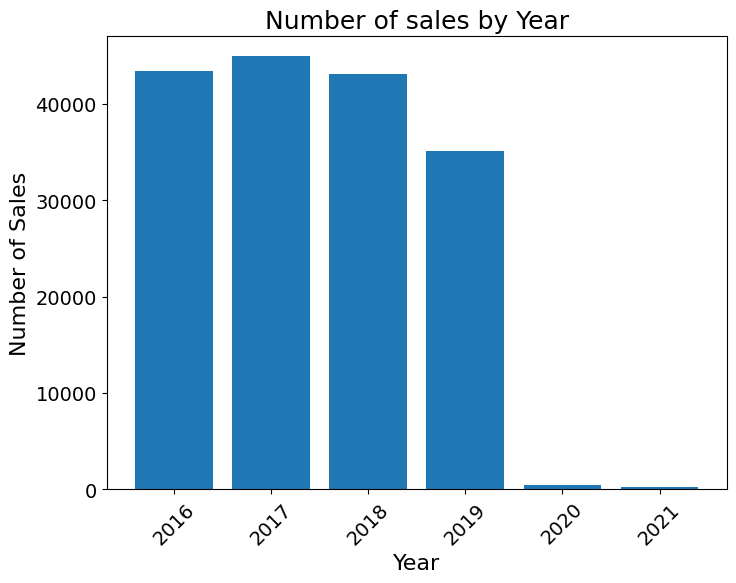

In [50]:
graph_number_of_sales_by_year(all_property_sales, number_of_sales_by_year)

#### Unemployment Rate by Year

Text(0.5, 1.0, 'Unemployment Rate by Year')

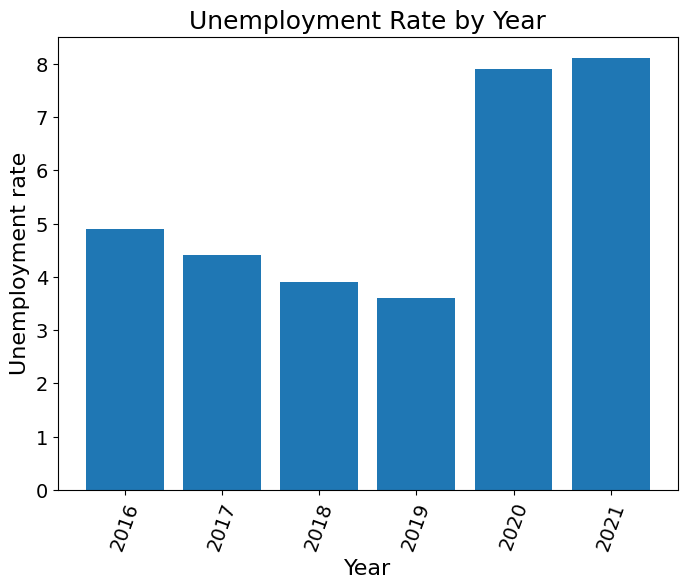

In [51]:
graph_the_unemployment_rate_by_year(overall_ct_report_by_year_updated)

#### unemployment Rate for last 2 years

Text(0.5, 1.0, 'Unemployment Rate (last 2 years) ')

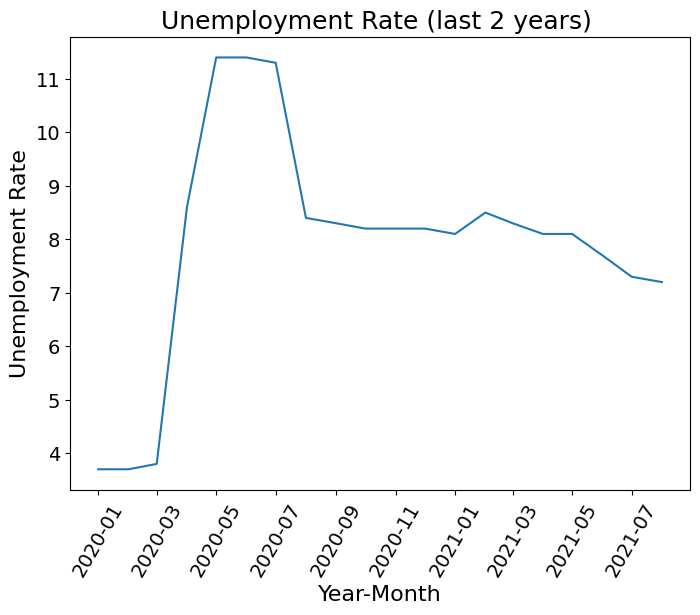

In [52]:
graph_the_unemployment_rate_last_two_years(overall_ct_report_by_month_cleaned)

#### Number of Sales by City, TOP 10 

Text(0.5, 1.0, 'Number of sales by Cities (Top 10)')

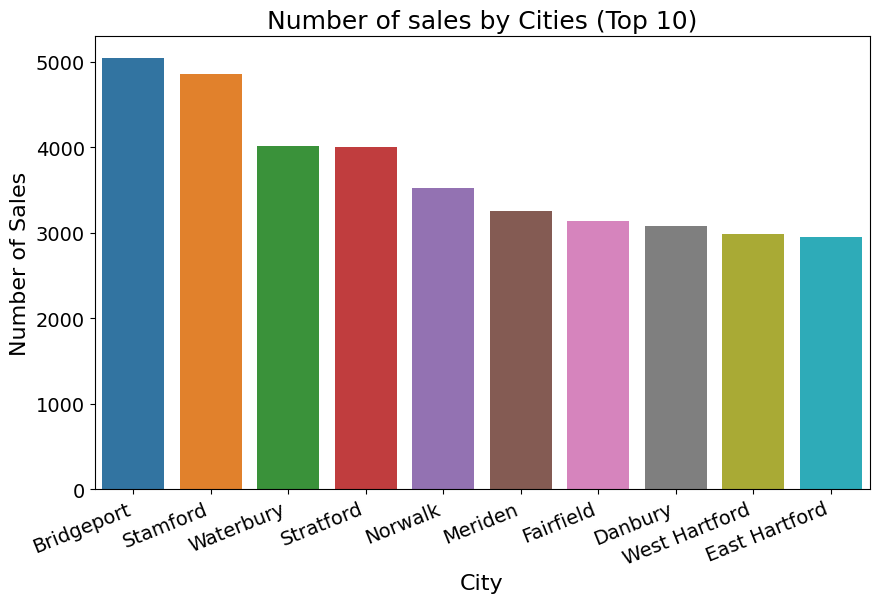

In [53]:
graph_n_of_sales_by_city(number_of_sales_by_city)

In [83]:
top_20_city_sold = get_n_of_sales_by_city_top_20(all_property_sales)
#top_20_city_sold

#### Next will be a Count for Number of Sales by City, (For the Image of the Conclusion)

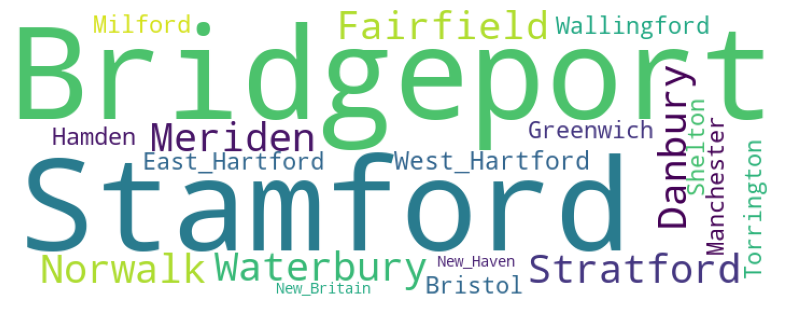

In [86]:
# data prepararion
city = top_20_city_sold.CITY
plt.subplots(figsize=(10,8), dpi=100)
wordcloud = WordCloud(
                          background_color='white',
                          width=720,
                          height=270
                         ).generate(" ".join(city))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Plotting graphs for N of houses sold different categories

#### GRAPHS for N of sales by city based on category

In [56]:
#graph_n_sales_by_year_low_price(number_of_sales_by_year_low_price)

In [57]:
#graph_n_sales_by_year_middle_price(number_of_sales_by_year_middle_price)

In [58]:
#graph_n_sales_by_year_high_price(number_of_sales_by_year_high_price)

### Comparison between price categories on number of sales

In [59]:
comparison_between_prices_on_n_sales = add_n_sales_by_categories_for_comparison(number_of_sales_by_year_low_price,number_of_sales_by_year_middle_price, number_of_sales_by_year_high_price)

In [60]:
comparison_between_prices_on_n_sales

,LOW PRICE,MIDDLE PRICE,LUXURY PRICE
YEAR SOLD,,,
2016,25657,13896,4243
2017,25107,14647,5623
2018,24602,14375,4536
2019,19732,12462,3288
2020,233,178,27
2021,149,106,23


<AxesSubplot:title={'center':'LOW PRICE VS MIDDLE PRICE VS LUXURY PRICE'}, xlabel='Year', ylabel='Number of sales'>

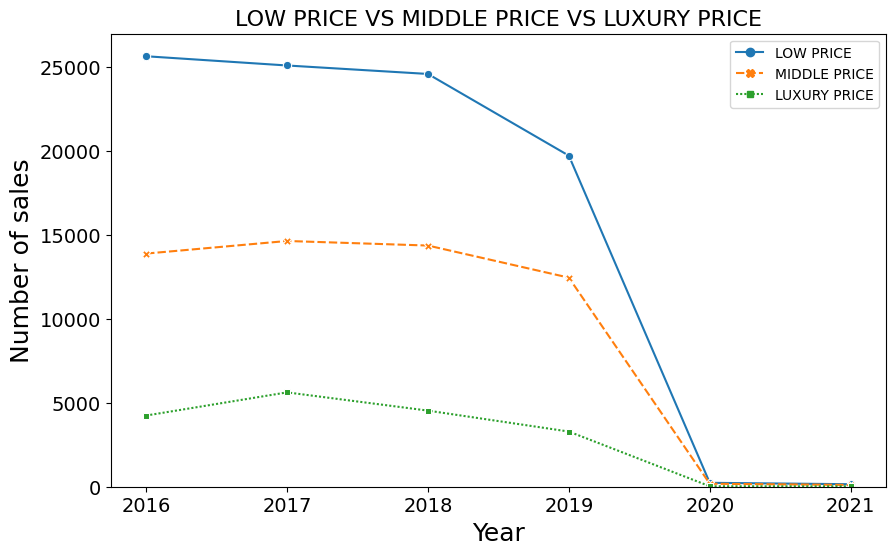

In [61]:
graph_add_n_sales_by_categories_for_comparison(comparison_between_prices_on_n_sales)

In [62]:
#graph_n_of_sales_by_city_low_price(n_sales_city_low_price)

In [63]:
#graph_n_of_sales_by_city_middle_price(n_sales_city_middle_price)

In [64]:
#graph_n_of_sales_by_city_lux_price(n_sales_city_luxury_price)

#### Number of Sales by CITY

In [65]:
top_10_cities_with_lat_lon = get_long_lat_for_top10_cities_sold(number_of_sales_by_city)

In [66]:
top_10_cities_with_lat_lon

,CITY,Number of Sales,Longitude,Latitude
0,Bridgeport,5042,-73.204835,41.167041
1,Stamford,4851,-73.538734,41.053430
2,Waterbury,4009,-73.043836,41.553809
3,Stratford,4000,-73.133165,41.184542
4,Norwalk,3517,-73.407897,41.117597
5,Meriden,3254,-72.807044,41.538153
6,Fairfield,3137,-73.263726,41.141208
7,Danbury,3075,-73.454011,41.394817
8,West Hartford,2990,-72.742040,41.762045
9,East Hartford,2955,-72.612035,41.782322


In [67]:
top_10_cities_with_lat_lon_less_than_100km_from_NY = get_distance_from_NY(top_10_cities_with_lat_lon)

In [68]:
top_10_cities_with_lat_lon_less_than_100km_from_NY

,CITY,Number of Sales,Longitude,Latitude,Distance_from_New_York (km)
0,Bridgeport,5042,-73.204835,41.167041,78.168348
1,Stamford,4851,-73.538734,41.053430,48.952453
3,Stratford,4000,-73.133165,41.184542,84.114242
4,Norwalk,3517,-73.407897,41.117597,61.723865
6,Fairfield,3137,-73.263726,41.141208,72.524022
7,Danbury,3075,-73.454011,41.394817,84.105003


In [69]:
cities_less_than_100km_from_ny = show_map_of_cities_for_sales_less_than_100km_ny(top_10_cities_with_lat_lon_less_than_100km_from_NY)

In [70]:
cities_less_than_100km_from_ny.save(MAPS_FOLDER + 'top_sales_city_less_than100km.html')

In [71]:
cities_less_than_100km_from_ny

### Type of properties sold 

In [72]:
count_types_properties_sold_overall = count_property_types_sold(all_property_sales)

In [73]:
count_types_properties_sold_overall

,PROPERTY TYPE,Number_of_Sales
0,Condo,31333
1,Multi-Family,11968
2,Single Family,123543
3,Vacant Land,345


Text(0.5, 1.0, 'Type of Properties Sold')

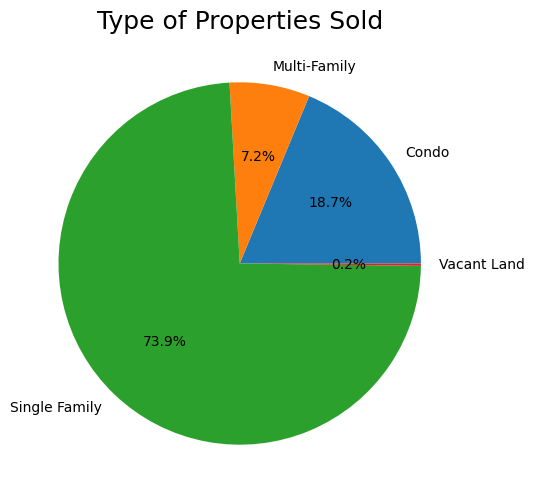

In [74]:
pie_chart_of_sales_by_cat(df=count_types_properties_sold_overall, col1='Number_of_Sales', col2='PROPERTY TYPE')

##### INCOME ANALYSIS by State, then Fairfield County vs CT OVERALL

In [75]:
df_all_counties_income_together

,YEAR,Fairfield County,Hartford County,Litchfield County,Middlessex County,New_haven County,New London County,Tolland County,Windham County
16,2016,89954,69341,76323,80190,66012,70258,81369,60869
17,2017,91170,70433,77968,81533,66764,71721,75571,62606
18,2018,91183,73037,76304,88709,67720,67790,89584,65182
19,2019,96966,75336,81015,81721,69687,75226,90181,63309


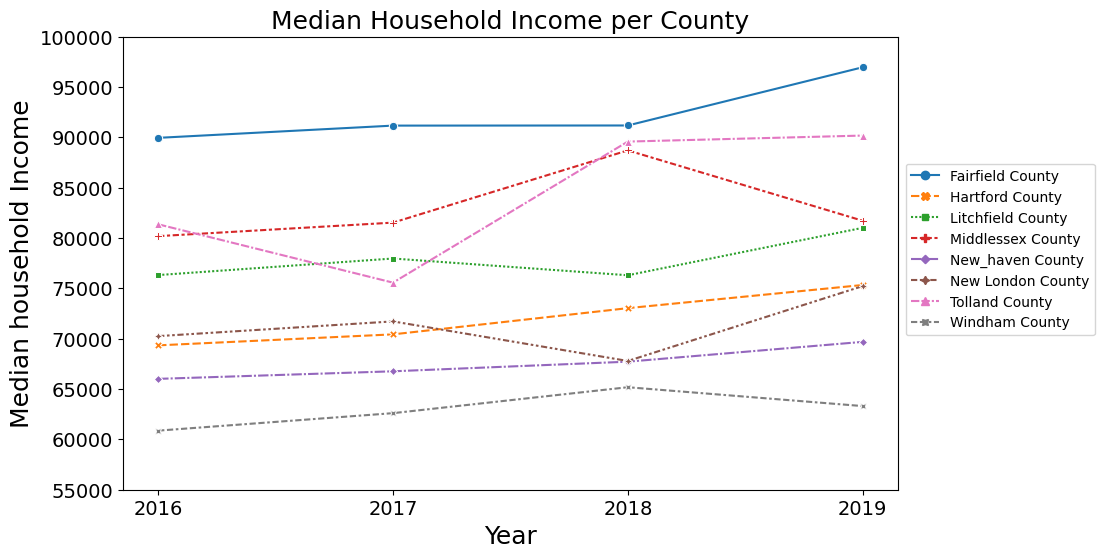

In [76]:
show_income_of_all_counties(df_all_counties_income_together)

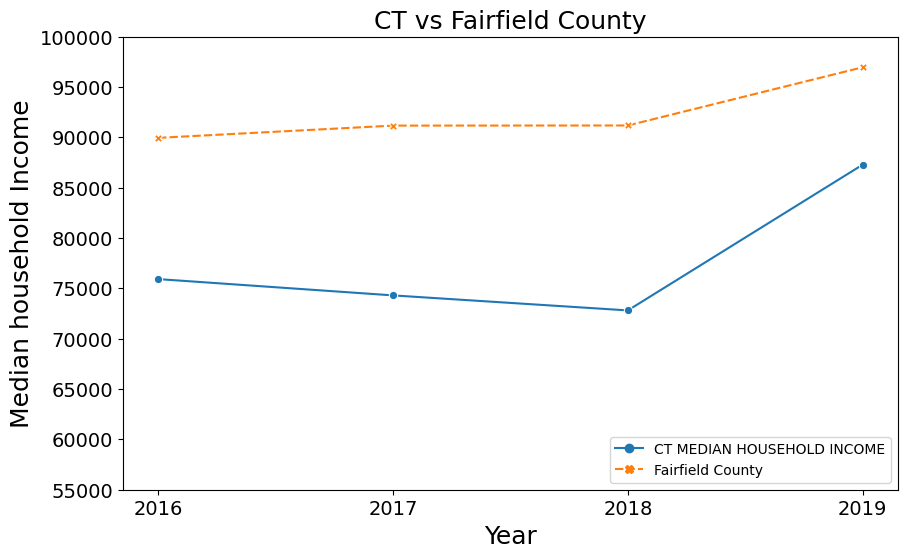

In [77]:
show_fairfield_income_vs_CT_median(income_CT_vs_FAIRFIELD)